# **Исследование компьютерных игр за период с 1998 по 2016 гг., выявление закономерностей с учетом рейтинга, оценки критиков и пользователей, периода и региона**

## **Описание проекта**

В работе представлена таблица с компьютерными играми games.csv, в которой данные до 2016 года.

В ней данные из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation).

В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной
рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

**Описание данных(столбцов)**
- Name — название игры
- Platform — платформа
- Year_of_Release — год выпуска
- Genre — жанр игры
- NA_sales — продажи в Северной Америке (миллионы проданных
копий)
- EU_sales — продажи в Европе (миллионы проданных копий)
- JP_sales — продажи в Японии (миллионы проданных копий)
- Other_sales — продажи в других странах (миллионы проданных
копий)
- Critic_Score — оценка критиков (максимум 100)
- User_Score — оценка пользователей (максимум 10)
- Rating — рейтинг от организации ESRB (англ. Entertainment
Software Rating Board). Эта ассоциация определяет рейтинг
компьютерных игр и присваивает им подходящую возрастную
категорию.
Данные за 2016 год могут быть неполными.



## Изучение общей информации

###  Изучение файлов с данными, получение общей информации, загрузка библиотек

***Шаг 1.*** Откройте файл с данными и изучите общую информацию
Путь к файлу: /datasets/games.csv. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('/datasets/games.csv', sep=',')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [4]:
data.head()

Name Platform  Year_of_Release         Genre  NA_sales  \
0                Wii Sports      Wii           2006.0        Sports     41.36   
1         Super Mario Bros.      NES           1985.0      Platform     29.08   
2            Mario Kart Wii      Wii           2008.0        Racing     15.68   
3         Wii Sports Resort      Wii           2009.0        Sports     15.61   
4  Pokemon Red/Pokemon Blue       GB           1996.0  Role-Playing     11.27   

   EU_sales  JP_sales  Other_sales  Critic_Score User_Score Rating  
0     28.96      3.77         8.45          76.0          8      E  
1      3.58      6.81         0.77           NaN        NaN    NaN  
2     12.76      3.79         3.29          82.0        8.3      E  
3     10.93      3.28         2.95          80.0          8      E  
4      8.89     10.22         1.00           NaN        NaN    NaN

##  Подготовка данных

***Шаг 2.***

Подготовьте данные
- Замените названия столбцов (приведите к нижнему регистру);
- Преобразуйте данные в нужные типы. Опишите, в каких
столбцах заменили тип данных и почему;

Обработайте пропуски при необходимости:
- Объясните, почему заполнили пропуски определённым
образом или почему не стали это делать;
- Опишите причины, которые могли привести к пропускам;
- Обратите внимание на аббревиатуру 'tbd' в столбце с
оценкой пользователей. Отдельно разберите это значение
и опишите, как его обработать;
- Посчитайте суммарные продажи во всех регионах и запишите их
в отдельный столбец.

### Анализ пропусков и переименование столбцов

In [5]:
#Замените названия столбцов (приведите к нижнему регистру)
data.columns = data.columns.str.lower()

In [6]:
#Обработайте пропуски при необходимости
pd.DataFrame(round(data.isna().mean()*100)).style.background_gradient('YlOrRd')

In [7]:
data.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

In [8]:
data.duplicated().sum()

0

### Приведение данных к нужным типам

In [9]:
#Преобразуйте данные в нужные типы. Опишите, в каких столбцах заменили тип данных и почему
data['year_of_release'] = data['year_of_release'].astype('Int64')
data['critic_score'] = data['critic_score'].astype('Int64')

***ПОЯСНЕНИЕ:*** Заменили тип данных  в 2х столбцах, т.к. в них целые числа

In [10]:
data.sort_values('user_score')['user_score'].unique()

array(['0', '0.2', '0.3', '0.5', '0.6', '0.7', '0.9', '1', '1.1', '1.2',
       '1.3', '1.4', '1.5', '1.6', '1.7', '1.8', '1.9', '2', '2.1', '2.2',
       '2.3', '2.4', '2.5', '2.6', '2.7', '2.8', '2.9', '3', '3.1', '3.2',
       '3.3', '3.4', '3.5', '3.6', '3.7', '3.8', '3.9', '4', '4.1', '4.2',
       '4.3', '4.4', '4.5', '4.6', '4.7', '4.8', '4.9', '5', '5.1', '5.2',
       '5.3', '5.4', '5.5', '5.6', '5.7', '5.8', '5.9', '6', '6.1', '6.2',
       '6.3', '6.4', '6.5', '6.6', '6.7', '6.8', '6.9', '7', '7.1', '7.2',
       '7.3', '7.4', '7.5', '7.6', '7.7', '7.8', '7.9', '8', '8.1', '8.2',
       '8.3', '8.4', '8.5', '8.6', '8.7', '8.8', '8.9', '9', '9.1', '9.2',
       '9.3', '9.4', '9.5', '9.6', '9.7', 'tbd', nan], dtype=object)

In [11]:
data['user_score'] = data['user_score'].replace('tbd', np.nan)
data['user_score'] = data['user_score'].astype('float64')

In [12]:
data.sort_values('user_score')['user_score'].unique()

array([0. , 0.2, 0.3, 0.5, 0.6, 0.7, 0.9, 1. , 1.1, 1.2, 1.3, 1.4, 1.5,
       1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2, 2.3, 2.4, 2.5, 2.6, 2.7, 2.8,
       2.9, 3. , 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8, 3.9, 4. , 4.1,
       4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9, 5. , 5.1, 5.2, 5.3, 5.4,
       5.5, 5.6, 5.7, 5.8, 5.9, 6. , 6.1, 6.2, 6.3, 6.4, 6.5, 6.6, 6.7,
       6.8, 6.9, 7. , 7.1, 7.2, 7.3, 7.4, 7.5, 7.6, 7.7, 7.8, 7.9, 8. ,
       8.1, 8.2, 8.3, 8.4, 8.5, 8.6, 8.7, 8.8, 8.9, 9. , 9.1, 9.2, 9.3,
       9.4, 9.5, 9.6, 9.7, nan])

***ПОЯСНЕНИЕ:*** Заменили тип данных в столбце user_score, т.к. там числа со знаком после запятой

### Удаление пропусков в данных

In [13]:
data = data.dropna(subset=['name','year_of_release','genre'])

In [14]:
data.isna().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8461
user_score         8981
rating             6676
dtype: int64

***ПОЯСНЕНИЕ:*** Удалили строки с незначительными по количеству пропусками в столбцах 'name','year_of_release','genre'

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  Int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   Int64  
 9   user_score       7463 non-null   float64
 10  rating           9768 non-null   object 
dtypes: Int64(2), float64(5), object(4)
memory usage: 1.5+ MB


In [16]:
data.head()

name platform  year_of_release         genre  na_sales  \
0                Wii Sports      Wii             2006        Sports     41.36   
1         Super Mario Bros.      NES             1985      Platform     29.08   
2            Mario Kart Wii      Wii             2008        Racing     15.68   
3         Wii Sports Resort      Wii             2009        Sports     15.61   
4  Pokemon Red/Pokemon Blue       GB             1996  Role-Playing     11.27   

   eu_sales  jp_sales  other_sales  critic_score  user_score rating  
0     28.96      3.77         8.45            76         8.0      E  
1      3.58      6.81         0.77          <NA>         NaN    NaN  
2     12.76      3.79         3.29            82         8.3      E  
3     10.93      3.28         2.95            80         8.0      E  
4      8.89     10.22         1.00          <NA>         NaN    NaN

***ПОЯСНЕНИЕ:*** Пропуски в столбцах critic_score, user_score, rating оставляем как есть. Пропуски в столбцах с оценками критиков и пользователей нельзя заменить на 0, т.к. это точные значения, 0 в данном случае бы означал оценку 0. Значение tbd заменили на nan, чтобы оставить только количественные значения и nan, которое не мешает вычеслениям.

In [17]:
data['rating'] = data['rating'].fillna(0)

### Суммарные продажи по всем регионам

In [18]:
#Посчитайте суммарные продажи во всех регионах и запишите их в отдельный столбец
data['total_sales'] = data['na_sales'] + data['eu_sales'] + data['jp_sales'] + data['other_sales']

In [19]:
data.head()

name platform  year_of_release         genre  na_sales  \
0                Wii Sports      Wii             2006        Sports     41.36   
1         Super Mario Bros.      NES             1985      Platform     29.08   
2            Mario Kart Wii      Wii             2008        Racing     15.68   
3         Wii Sports Resort      Wii             2009        Sports     15.61   
4  Pokemon Red/Pokemon Blue       GB             1996  Role-Playing     11.27   

   eu_sales  jp_sales  other_sales  critic_score  user_score rating  \
0     28.96      3.77         8.45            76         8.0      E   
1      3.58      6.81         0.77          <NA>         NaN      0   
2     12.76      3.79         3.29            82         8.3      E   
3     10.93      3.28         2.95            80         8.0      E   
4      8.89     10.22         1.00          <NA>         NaN      0   

   total_sales  
0        82.54  
1        40.24  
2        35.52  
3        32.77  
4        31.38

## Исследовательский анализ данных

***Шаг 3.***

Проведите исследовательский анализ данных
- Посмотрите, сколько игр выпускалось в разные годы. Важны ли
данные за все периоды?
- Посмотрите, как менялись продажи по платформам. Выберите
платформы с наибольшими суммарными продажами и постройте
распределение по годам. За какой характерный срок появляются
новые и исчезают старые платформы?
- Возьмите данные за соответствующий актуальный период.
Актуальный период определите самостоятельно в результате
исследования предыдущих вопросов. Основной фактор — эти
данные помогут построить прогноз на 2017 год.
- Не учитывайте в работе данные за предыдущие годы.
- Какие платформы лидируют по продажам, растут или падают?
Выберите несколько потенциально прибыльных платформ.
- Постройте график «ящик с усами» по глобальным продажам игр
в разбивке по платформам. Опишите результат.
- Посмотрите, как влияют на продажи внутри одной популярной
платформы отзывы пользователей и критиков. Постройте
диаграмму рассеяния и посчитайте корреляцию между отзывами
и продажами. Сформулируйте выводы.
- Соотнесите выводы с продажами игр на других платформах.
- Посмотрите на общее распределение игр по жанрам. Что можно
сказать о самых прибыльных жанрах? Выделяются ли жанры с
высокими и низкими продажами?

### Анализ игр по годам

In [20]:
#Посмотрите, сколько игр выпускалось в разные годы. Важны ли данные за все периоды?
data.groupby('year_of_release')['year_of_release'].agg('count')

year_of_release
1980       9
1981      46
1982      36
1983      17
1984      14
1985      14
1986      21
1987      16
1988      15
1989      17
1990      16
1991      41
1992      43
1993      60
1994     121
1995     219
1996     263
1997     289
1998     379
1999     338
2000     350
2001     482
2002     829
2003     775
2004     762
2005     939
2006    1006
2007    1197
2008    1427
2009    1426
2010    1255
2011    1136
2012     653
2013     544
2014     581
2015     606
2016     502
Name: year_of_release, dtype: int64

Text(0.5, 1.0, 'Число игр, выпускающихся за период с 1980 по 2016 годы')

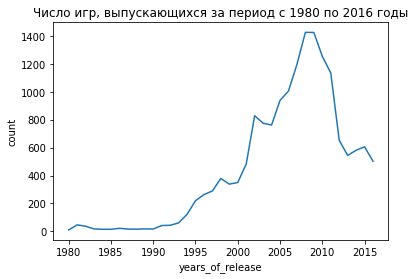

In [21]:
ax = data.groupby('year_of_release')['year_of_release'].agg('count').plot()
ax.set_xlabel('years_of_release')
ax.set_ylabel('count')
ax.set_title('Число игр, выпускающихся за период с 1980 по 2016 годы')

Text(0.5, 1.0, 'Число выпущенных игр и суммарные продажи с 1980 по 2016 года')

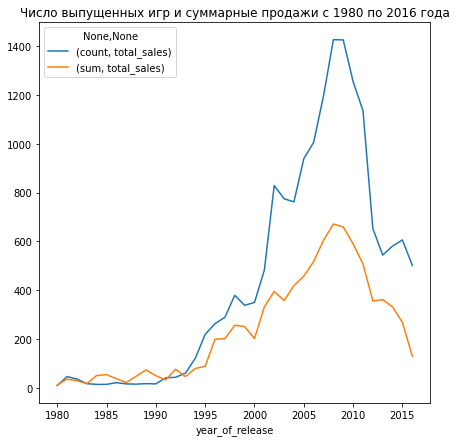

In [22]:
ax = data.pivot_table(index=('year_of_release'), values='total_sales', aggfunc=['count', 'sum']).plot(figsize=(7,7))
ax.set_title('Число выпущенных игр и суммарные продажи с 1980 по 2016 года')

***ПОЯСНЕНИЕ:*** Можно сказать, что с 1994 года данные более существенны, графики количества выщенных игр и обьема продаж подтверждают данные.

In [23]:
#Посмотрите, как менялись продажи по платформам. 
data.groupby('platform')['total_sales'].agg(['sum', 'count']).sort_values(by = 'sum', ascending = False)

sum  count
platform                
PS2       1233.56   2127
X360       961.24   1232
PS3        931.34   1306
Wii        891.18   1286
DS         802.78   2121
PS         727.58   1190
PS4        314.14    392
GBA        312.88    811
PSP        289.53   1193
3DS        257.81    512
PC         255.76    957
GB         254.43     97
XB         251.57    803
NES        251.05     98
N64        218.01    316
SNES       200.04    239
GC         196.73    542
XOne       159.32    247
2600        86.48    116
WiiU        82.19    147
PSV         53.81    429
SAT         33.59    173
GEN         28.35     27
DC          15.95     52
SCD          1.86      6
NG           1.44     12
WS           1.42      6
TG16         0.16      2
3DO          0.10      3
GG           0.04      1
PCFX         0.03      1

In [24]:
#Выберите платформы с наибольшими суммарными продажами и постройте распределение по годам. 
data.groupby('platform')['total_sales'].agg(['sum']).sort_values(by = 'sum', ascending = False).head(10).index.tolist()

['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS', 'PS4', 'GBA', 'PSP', '3DS']

In [25]:
data.query('platform == ["PS2", "X360", "PS3", "Wii", "DS", "PS", "PS4", "GBA", "PSP", "3DS"]') \
.pivot_table(index= ['year_of_release', 'platform'],\
values='total_sales', aggfunc='sum').sort_values(by = 'total_sales', ascending = False)

total_sales
year_of_release platform             
2004            PS2            211.81
2009            Wii            206.97
2002            PS2            205.38
2003            PS2            184.31
2008            Wii            171.32
...                               ...
2014            PSP              0.24
2016            Wii              0.18
2015            PSP              0.12
2000            GBA              0.07
1985            DS               0.02

[97 rows x 1 columns]

In [26]:
data.query('platform == ["PS2", "X360", "PS3", "Wii", "DS", "PS", "PS4", "GBA", "PSP", "3DS"]') \
.pivot_table(index='platform', columns='year_of_release', values='total_sales', aggfunc='sum')

year_of_release  1985  1994   1995  1996    1997    1998    1999   2000  \
platform                                                                  
3DS               NaN   NaN    NaN   NaN     NaN     NaN     NaN    NaN   
DS               0.02   NaN    NaN   NaN     NaN     NaN     NaN    NaN   
GBA               NaN   NaN    NaN   NaN     NaN     NaN     NaN   0.07   
PS                NaN  6.03  35.96  94.7  136.17  169.49  144.53  96.37   
PS2               NaN   NaN    NaN   NaN     NaN     NaN     NaN  39.17   
PS3               NaN   NaN    NaN   NaN     NaN     NaN     NaN    NaN   
PS4               NaN   NaN    NaN   NaN     NaN     NaN     NaN    NaN   
PSP               NaN   NaN    NaN   NaN     NaN     NaN     NaN    NaN   
Wii               NaN   NaN    NaN   NaN     NaN     NaN     NaN    NaN   
X360              NaN   NaN    NaN   NaN     NaN     NaN     NaN    NaN   

year_of_release    2001    2002  ...    2007    2008    2009    2010    2011  \
platform                         ...                                           
3DS                 NaN     NaN  ...     NaN     NaN     NaN     NaN   63.20   
DS                  NaN     NaN  ...  146.94  145.31  119.54   85.02   26.18   
GBA               61.53   74.16  ...    3.40     NaN     NaN     NaN     NaN   
PS                35.59    6.67  ...     NaN     NaN     NaN     NaN     NaN   
PS2              166.43  205.38  ...   75.99   53.90   26.40    5.64    0.45   
PS3                 NaN     NaN  ...   73.19  118.52  130.93  142.17  156.78   
PS4                 NaN     NaN  ...     NaN     NaN     NaN     NaN     NaN   
PSP                 NaN     NaN  ...   46.93   34.55   37.78   35.04   17.82   
Wii                 NaN     NaN  ...  152.77  171.32  206.97  127.95   59.65   
X360                NaN     NaN  ...   95.41  135.26  120.29  170.03  143.84   

year_of_release    2012    2013    2014    2015   2016  
platform                                                
3DS               51.36   56.57   43.76   27.78  15.14  
DS                11.01    1.54     NaN     NaN    NaN  
GBA                 NaN     NaN     NaN     NaN    NaN  
PS                  NaN     NaN     NaN     NaN    NaN  
PS2                 NaN     NaN     NaN     NaN    NaN  
PS3              107.36  113.25   47.76   16.82   3.60  
PS4                 NaN   25.99  100.00  118.90  69.25  
PSP                7.69    3.14    0.24    0.12    NaN  
Wii               21.71    8.59    3.75    1.14   0.18  
X360              99.74   88.58   34.74   11.96   1.52  

[10 rows x 24 columns]

### Срок жизни игровой платформы

Text(0.5, 1.0, 'Распределение по годам жизненного срока платформ')

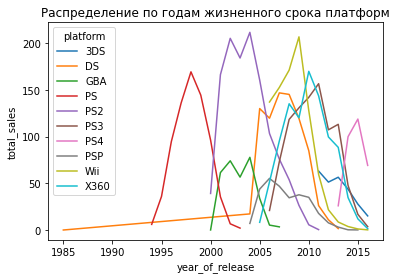

In [27]:
#За какой характерный срок появляются новые и исчезают старые платформы?
data_10_platform_all_years = data.query('platform == ["PS2", "X360", "PS3", "Wii", "DS", "PS", "PS4", "GBA", "PSP", "3DS"]').groupby(['platform','year_of_release'], as_index=False)['total_sales'].sum()
ax = sns.lineplot(data=data_10_platform_all_years, x='year_of_release', y='total_sales', hue='platform')
ax.set_title('Распределение по годам жизненного срока платформ')


***ПОЯСНЕНИЕ:*** Выбраны топ-10 платформ по сумме продаж за все года. 
На графике видно что жизнь платформы примерно равна 10 лет.
Также видно, что почти все платформы заканчивают свой жизненный цикл к 2016 году.

platform
3DS      5
DS      28
GBA      7
PS       9
PS2     11
PS3     10
PS4      3
PSP     11
Wii     10
X360    11
Name: year_of_release, dtype: int64


Text(0.5, 1.0, 'Срок жизни платформ')

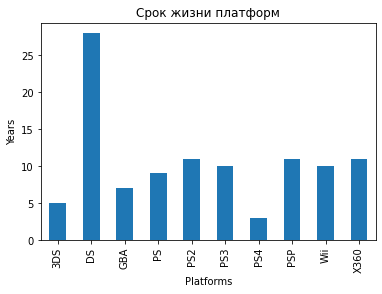

In [28]:
data_year = data_10_platform_all_years.groupby('platform')['year_of_release']
data_year = data_year.max() - data_year.min()
print(data_year)
ax = data_year.plot(kind='bar')
ax.set_xlabel('Platforms')
ax.set_ylabel('Years')
ax.set_title('Срок жизни платформ')

### Анализ данных с 2011 год (данные за ранние периоды не учитываются)

In [29]:
#Возьмите данные за соответствующий актуальный период.
#Актуальный период определите самостоятельно в результате исследования предыдущих вопросов. 
#Основной фактор — эти данные помогут построить прогноз на 2017 год.
#Не учитывайте в работе данные за предыдущие годы.

In [30]:
data_2011_2016 = data.query('year_of_release >= 2011')

***ПОЯСНЕНИЕ:*** Продажи с 2005-2016 в одном диапазоне для отдельно взятой платформы

In [31]:
#Какие платформы лидируют по продажам, растут или падают? Выберите несколько потенциально прибыльных платформ.
data_2011_2016.groupby('platform')['total_sales'].agg('sum').sort_values(ascending = False).head().index.tolist()

['PS3', 'X360', 'PS4', '3DS', 'XOne']

### «Ящик с усами» по глобальным продажам игр в разбивке по платформам

(-1.0, 2.0)

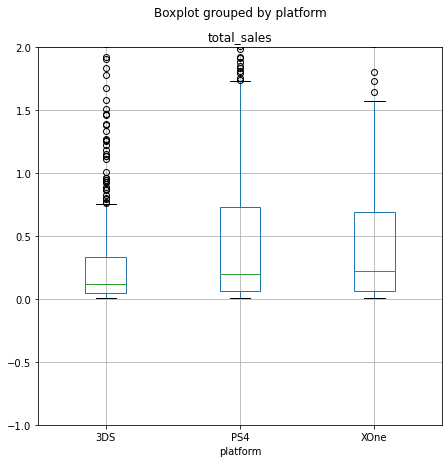

In [32]:
#Постройте график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Опишите результат.
data_2011_2016 = data.query('platform == ["PS4", "3DS", "XOne"]')
data_2011_2016.boxplot(column='total_sales', by='platform', figsize=(7,7), return_type='axes')
plt.ylim(-1, 2)

***ПОЯСНЕНИЕ:*** Из трех самая прибыльная PS4, отстает по продажам больше всех 3DS

###  Выявление закономерностей между продажами внутри одной популярной платформы и отзывами пользователей и критиков

user_score  critic_score  total_sales
user_score      1.000000      0.557654    -0.031957
critic_score    0.557654      1.000000     0.406568
total_sales    -0.031957      0.406568     1.000000

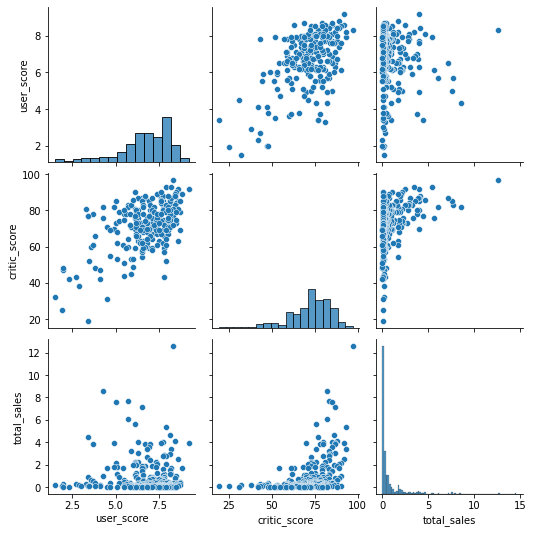

In [33]:
#Посмотрите, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. 
data_PS4 = data_2011_2016.query('platform == "PS4"')
#Постройте диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами.
sns.pairplot(data_PS4[['user_score', 'critic_score', 'total_sales']])
data_PS4[['user_score', 'critic_score', 'total_sales']].corr()

In [34]:
#Сформулируйте выводы.

***ПОЯСНЕНИЕ:*** По графикам видно что при высоких оценках user_score и critic_score больше продаж в total_sales, корреляция есть, но слабая

### Соотношение выводов с продажами игр на других платформах

In [35]:
#Соотнесите выводы с продажами игр на других платформах.
data_2011_2016.groupby('platform')[['user_score', 'critic_score', 'total_sales']].corr()

user_score  critic_score  total_sales
platform                                                    
3DS      user_score      1.000000      0.745222     0.222078
         critic_score    0.745222      1.000000     0.348740
         total_sales     0.222078      0.348740     1.000000
PS4      user_score      1.000000      0.557654    -0.031957
         critic_score    0.557654      1.000000     0.406568
         total_sales    -0.031957      0.406568     1.000000
XOne     user_score      1.000000      0.472462    -0.068925
         critic_score    0.472462      1.000000     0.416998
         total_sales    -0.068925      0.416998     1.000000

***ПОЯСНЕНИЕ:*** Наибольшая корреляция у платформы PS4, затем у XOne и 3DS. Значение корреляции <0.5 говорит о том, что связь слабая. Большее значение именно у critic_score, что означает большую зависимость от оценки критиков.

### Исследование распределения игр по жанрам

In [36]:
#Посмотрите на общее распределение игр по жанрам.
data_2011_2016.groupby('genre')['total_sales'].agg('sum').sort_values(ascending = False)

genre
Action          191.25
Shooter         150.11
Role-Playing    123.74
Sports           88.50
Platform         41.15
Racing           36.80
Simulation       28.88
Misc             26.61
Fighting         21.66
Adventure        13.85
Puzzle            5.59
Strategy          3.13
Name: total_sales, dtype: float64

<AxesSubplot:xlabel='genre'>

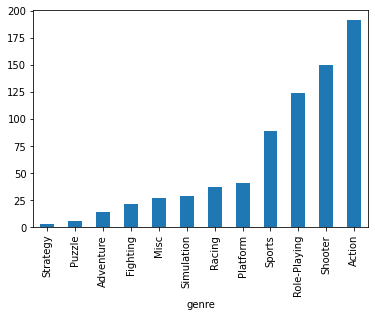

In [37]:
data_2011_2016.groupby('genre')['total_sales'].agg('sum').sort_values(ascending = True).plot(kind='bar')

In [38]:
#Что можно сказать о самых прибыльных жанрах? 
#Выделяются ли жанры с высокими и низкими продажами?

***ПОЯСНЕНИЕ:***

ТОП-5 жанра по уровню общих продаж:
- Action          191.25
- Shooter         150.11
- Role-Playing    123.74
- Sports           88.50
- Platform         41.15

Самые низкие продажи:
- Adventure        13.85
- Puzzle            5.59
- Strategy          3.13

(-1.0, 2.0)

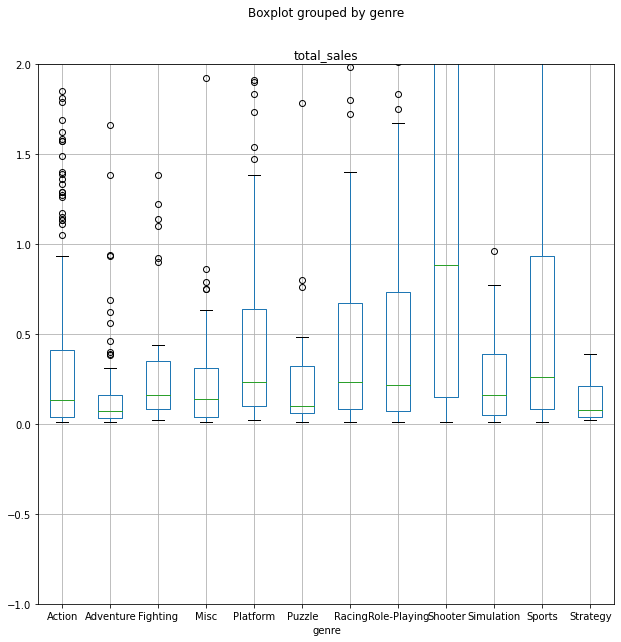

In [39]:
data_2011_2016.boxplot(column='total_sales', by='genre', figsize=(10,10), return_type='axes')
plt.ylim(-1, 2)

## Описание портрета пользователя каждого региона

***Шаг 4.***

Составьте портрет пользователя каждого региона

Определите для пользователя каждого региона (NA, EU, JP):
- Самые популярные платформы (топ-5). Опишите различия в
долях продаж.
- Самые популярные жанры (топ-5). Поясните разницу.
- Влияет ли рейтинг ESRB на продажи в отдельном регионе?

In [40]:
#Самые популярные платформы (топ-5). Опишите различия в долях продаж.
data_2011_2016 = data.query('year_of_release >= 2011')

### Топ-5 популярных платформ по регионам

In [41]:
data_2011_2016.groupby('platform')['na_sales'].sum().sort_values(ascending = False).head().index.tolist()

['X360', 'PS3', 'PS4', 'XOne', '3DS']

In [42]:
data_2011_2016.groupby('platform')['eu_sales'].sum().sort_values(ascending = False).head().index.tolist()

['PS3', 'PS4', 'X360', '3DS', 'PC']

In [43]:
data_2011_2016.groupby('platform')['jp_sales'].sum().sort_values(ascending = False).head().index.tolist()

['3DS', 'PS3', 'PSP', 'PSV', 'PS4']

array([<AxesSubplot:ylabel='na_sales'>, <AxesSubplot:ylabel='eu_sales'>,
       <AxesSubplot:ylabel='jp_sales'>], dtype=object)

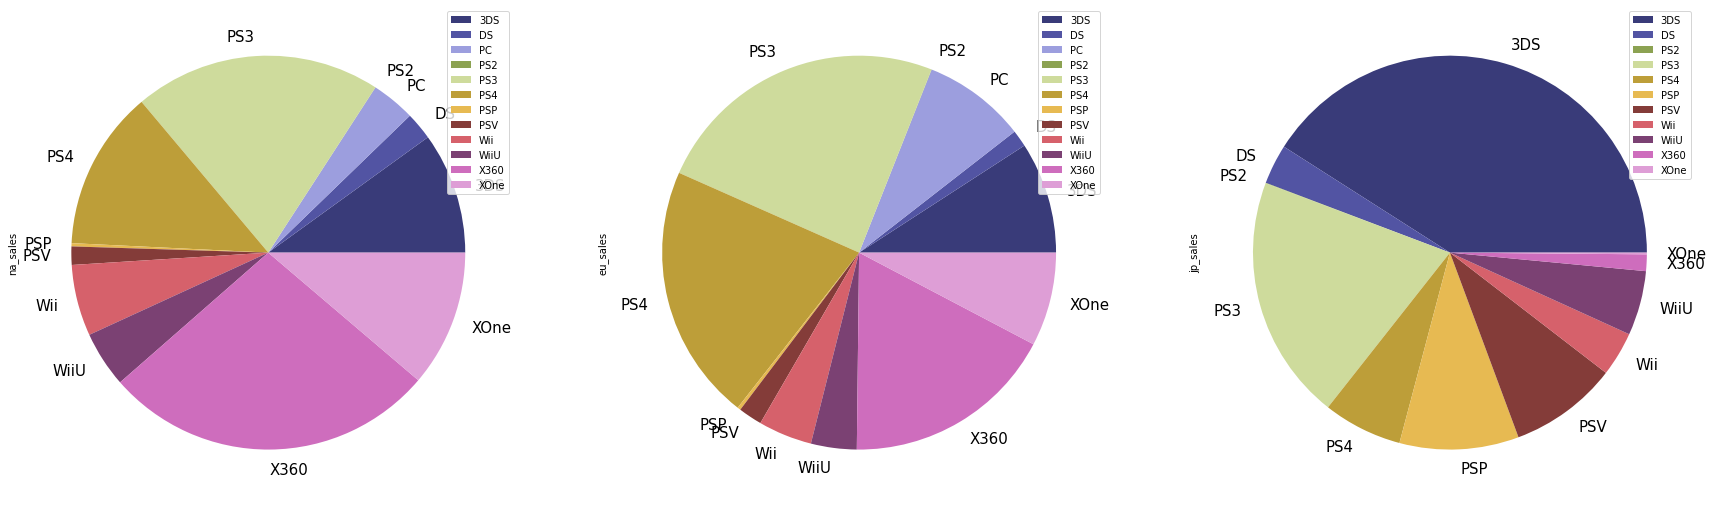

In [44]:
import matplotlib.colors as c
data_2011_2016.groupby('platform')[['na_sales','eu_sales', 'jp_sales']].sum().plot(kind='pie', subplots=True, figsize=(30, 30), colormap='tab20b', fontsize=15)

***ПОЯСНЕНИЕ:*** 

ТОП-5 для na_sales: ['X360', 'PS3', 'PS4', 'XOne', '3DS']

ТОП-5 для eu_sales: ['PS3', 'PS4', 'X360', '3DS', 'PC']

ТОП-5 для jp_sales: ['3DS', 'PS3', 'PSP', 'PSV', 'PS4']

### Топ-5 популярных жанров

In [45]:
#Самые популярные жанры (топ-5). Поясните разницу.

In [46]:
data_2011_2016.groupby('genre')['na_sales'].sum().sort_values(ascending = False).head().index.tolist()

['Action', 'Shooter', 'Sports', 'Role-Playing', 'Misc']

In [47]:
data_2011_2016.groupby('genre')['eu_sales'].sum().sort_values(ascending = False).head().index.tolist()

['Action', 'Shooter', 'Sports', 'Role-Playing', 'Racing']

In [48]:
data_2011_2016.groupby('genre')['jp_sales'].sum().sort_values(ascending = False).head().index.tolist()

['Role-Playing', 'Action', 'Misc', 'Fighting', 'Platform']

array([<AxesSubplot:ylabel='na_sales'>, <AxesSubplot:ylabel='eu_sales'>,
       <AxesSubplot:ylabel='jp_sales'>], dtype=object)

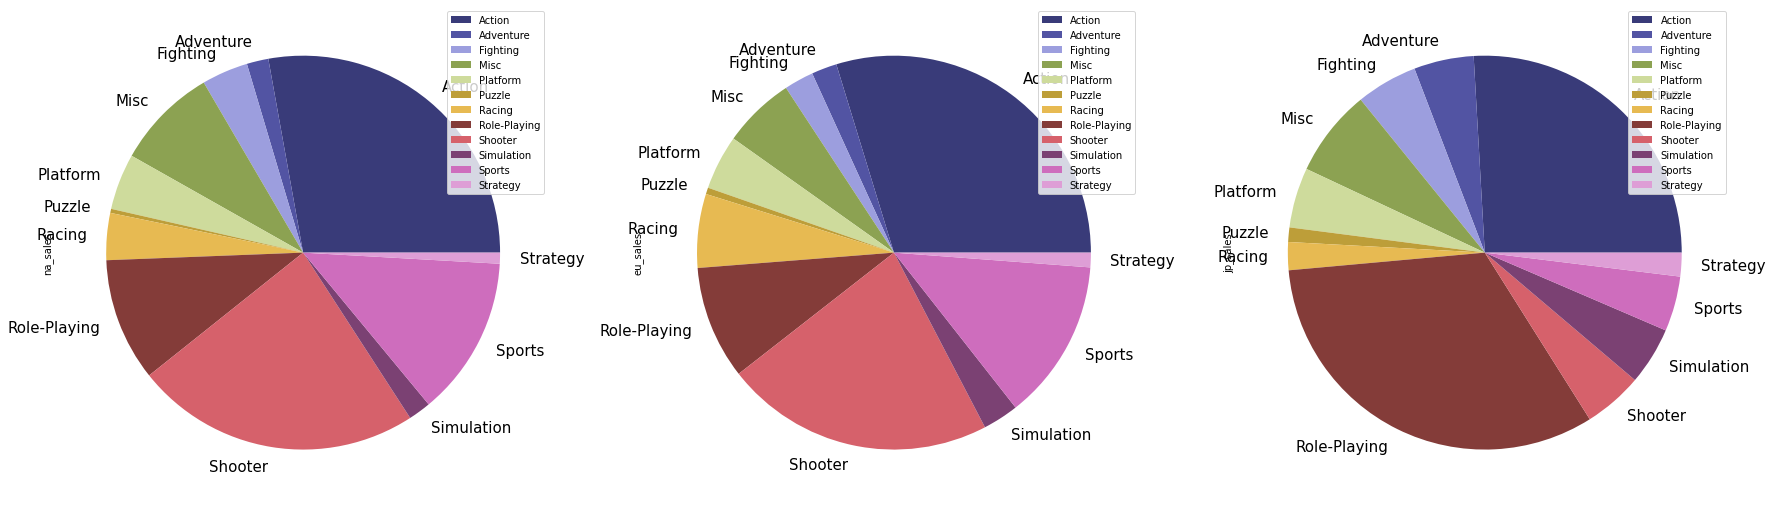

In [49]:
data_2011_2016.groupby('genre')[['na_sales','eu_sales', 'jp_sales']].sum().plot(kind='pie', subplots=True, figsize=(30,30),  colormap='tab20b', fontsize=15)

***ПОЯСНЕНИЕ:*** 

ТОП-5 для na_sales: ['Action', 'Shooter', 'Sports', 'Role-Playing', 'Misc']

ТОП-5 для eu_sales: ['Action', 'Shooter', 'Sports', 'Role-Playing', 'Racing']

ТОП-5 для jp_sales: ['Role-Playing', 'Action', 'Misc', 'Fighting', 'Platform']

В основном, во всех регионах лидирующую позицию занимает жанр Action, Sports, Misc. Эти жанры встречаются во всех 3х регионах в ТОП-5. Также эти 3 жанра в ТОПе по общей прибыли. Различия по регионам все же есть, больше всего отличается jp_sales. В jp_sales лидирующую позицию занимает Role-Playing. Если и по культуре США и Европа схожи, то Япония сильно отличается, также и в игровой индустрии.

### Анализ влияния рейтинга ESRB на продажи в отдельном регионе

array([<AxesSubplot:ylabel='na_sales'>, <AxesSubplot:ylabel='eu_sales'>,
       <AxesSubplot:ylabel='jp_sales'>], dtype=object)

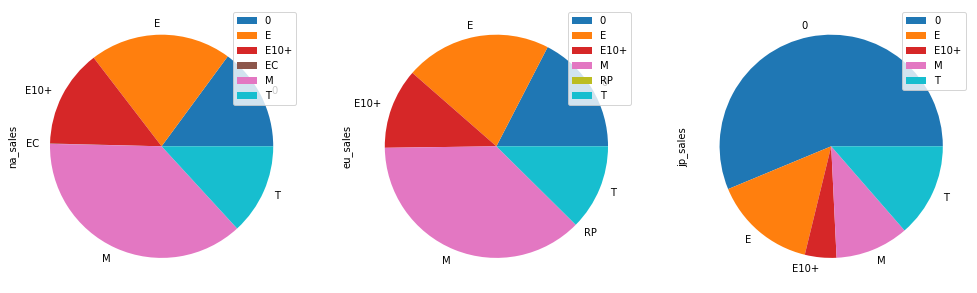

In [50]:
#Влияет ли рейтинг ESRB на продажи в отдельном регионе?
data_2011_2016.groupby('rating')[['na_sales','eu_sales', 'jp_sales']].sum().plot(kind='pie', subplots=True, figsize=(17,17), colormap='tab10')

In [51]:
data_2011_2016.groupby('rating')[['na_sales','eu_sales', 'jp_sales']].sum().sort_values(by='na_sales', ascending = False)

na_sales  eu_sales  jp_sales
rating                              
M         308.45    250.26     26.14
E         170.17    141.73     36.68
0         123.69    116.61    138.21
E10+      117.72     78.00     11.23
T         109.31     83.16     33.39
EC          0.42      0.00      0.00
RP          0.00      0.03      0.00

***ПОЯСНЕНИЕ:*** 

ТОП-5 рейтинг ESRB для США и Европы: 
1. М(«Mature»)— «Для взрослых»
2. Е(«Everyone»)— «Для всех»
3. 0(«Без рейтинга»)
4. Е10+(«Everyone 10 and older») — «Для всех от 10 лет и старше»
5. T(«Teen»)


ТОП-5 рейтинг ESRB для Японии: 
1. 0(«Без рейтинга») 
2. Е(«Everyone»)— «Для всех»
3. T(«Teen»)
4. М(«Mature»)— «Для взрослых» 
5. Е10+(«Everyone 10 and older») — «Для всех от 10 лет и старше»

Рейтинг ЕС, RP нулевые (почти)

**ВЫВОД**

Для региона na_sales:
- платформа(ТОП-5) 'X360', 'Wii', 'PS3', 'DS', 'PS2'
- жанр(ТОП-5) 'Action', 'Sports', 'Shooter', 'Misc', 'Role-Playing'
- рейтинг ESRB (ТОП-4) Е(«Everyone»), М(«Mature»), Т(«Teen»), Е10+(«Everyone 10 and older») 

Для региона eu_sales:
- платформа(топ-5) 'PS3', 'X360', 'Wii', 'DS', 'PS4'
- жанр(ТОП-5) 'Action', 'Sports', 'Shooter', 'Misc', 'Racing'
- рейтинг ESRB (ТОП-4) Е(«Everyone»), М(«Mature»), Т(«Teen»), Е10+(«Everyone 10 and older») 

Для региона jp_sales:
- платформа(топ-5) 'DS', '3DS', 'PS3', 'PSP', 'Wii'
- жанр(ТОП-5) 'Role-Playing', 'Action', 'Misc', 'Sports', 'Platform'
- рейтинг ESRB (ТОП-4) Е(«Everyone»), Т(«Teen»), М(«Mature»), Е10+(«Everyone 10 and older») 

## Проверка гипотез

***Шаг 5.***

Проверьте гипотезы
- Средние пользовательские рейтинги платформ Xbox One и PC
одинаковые;
- Средние пользовательские рейтинги жанров Action (англ.
«действие», экшен-игры) и Sports (англ. «спортивные
соревнования») разные.

Задайте самостоятельно пороговое значение alpha.
Поясните:
- Как вы сформулировали нулевую и альтернативную гипотезы;
- Какой критерий применили для проверки гипотез и почему.

***ПОЯСНЕНИЕ:***

Нулевые гипотезы:
- Средние пользовательские рейтинги платформ Xbox One и PC
одинаковые;
- Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») не разные

alpha = 0.05 (Уровень значимости - суммарная вероятность того, что измеренное эмпирически значение окажется далеко от среднего)

Альтернативные гипотезы:
- Средние пользовательские рейтинги платформ Xbox One и PC
 не одинаковые;
- Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные


Критерий для проверки гипотез - st.ttest_ind проверка гипотезы о равенстве среднего двух генеральных совокупностей по взятым из них выборкам

### Первая гипотеза

In [52]:
#Проверьте гипотезу: средние пользовательские рейтинги платформ Xbox One и PC одинаковые

from scipy import stats as st
data_2011_2016 = data_2011_2016.dropna(subset=['user_score'])

before = data_2011_2016.query('platform == "XOne"')['user_score']

after = data_2011_2016.query('platform == "PC"')['user_score']

alpha = .05 # критический уровень статистической значимости

results = st.ttest_ind(
    before, 
    after)

print('p-значение: ', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-значение:  0.6267602271422398
Не получилось отвергнуть нулевую гипотезу


### Вторая гипотеза

In [53]:
#Проверьте гипотезу: средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports 
#(англ. «спортивные соревнования») разные

from scipy import stats as st

before = data_2011_2016.query('genre == "Action"')['user_score']

after = data_2011_2016.query('genre == "Sports"')['user_score']

alpha = .05 # критический уровень статистической значимости

results = st.ttest_ind(
    before, 
    after)

print('p-значение: ', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-значение:  5.1974550252152054e-24
Отвергаем нулевую гипотезу


## Общие выводы

***Шаг 6.***

Напишите общий вывод

Оформление: 
- Выполните задание в Jupyter Notebook. 
- Заполните программный код в ячейках типа code, текстовые пояснения — в ячейках типа markdown. 
- Примените форматирование и заголовки.

### Вводная часть

***В таблице games 16715 строк, включает следующие столбцы:***
- Name — название игры
- Platform — платформа
- Year_of_Release — год выпуска
- Genre — жанр игры
- NA_sales — продажи в Северной Америке (миллионы проданных
копий)
- EU_sales — продажи в Европе (миллионы проданных копий)
- JP_sales — продажи в Японии (миллионы проданных копий)
- Other_sales — продажи в других странах (миллионы проданных
копий)
- Critic_Score — оценка критиков (максимум 100)
- User_Score — оценка пользователей (максимум 10)
- Rating — рейтинг от организации ESRB 

### Описание всех производимых действий с данными

***При подготовке данных к анализу произвели следующие действия:***
1. удалили строки с незначительными по количеству пропусками в столбцах 'name','year_of_release','genre'
2. привели названия столбцов к нижнему регистру
3. заменили тип данных в 2х столбцах 'year_of_release' и 'critic_score', т.к. в них целые числа
4. заменили тип данных в столбце user_score, т.к. там числа со знаком после запятой. Значение tbd заменили на nan, чтобы оставить только количественные значения и nan, которое не мешает вычеслениям.
5. пропуски в столбцах critic_score, user_score. Пропуски в столбцах с оценками критиков и пользователей нельзя заменить на 0, т.к. это точные значения, 0 в данном случае бы означал оценку 0.
6. пропуски rating заменили на 0. 
7. посчитали суммарные продажи во всех регионах и запишите их в отдельный столбец 'total_sales'


### Вывод по исследовательскому анализу данных

***Провели исследовательский анализ данных:***

1. При анализе игр в разные годы выявлено следующее:
- 1980-1993 от 9 до 60 шт выпускалось в год
- 1994-2005 от 121 до 939 шт 
- 2006-2011 1006-1427
- 2012-2016 502-653

Можно сказать, что с 1994 года данные более существенны, графики количества выщенных игр и обьема продаж подтверждают данные.

2. Как менялись продажи по платформам:

ТОП-10 платформ по сумме продаж за все года ['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS', 'PS4', 'GBA', 'PSP', '3DS']

Жизнь платформы примерно равна 3-5 лет. Также видно, что почти все платформы заканчивают свой жизненный цикл к 2016 году.

3. Определили, что актуальный период для анализа это продажи диапазон 2011-2016 гг. Эти данные помогут построить прогноз на 2017 год. Далее анализ данных будет только по данным за период с 2011 года.

4. Какие платформы лидируют по продажам:

ТОП-5 : 'PS3', 'X360', 'PS4', '3DS', 'XOne'

Наиболее прибыльные платформы Xone, PS4, 3DS

5. Как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков:

На примере платформы PS4 мы выяснили, что при высоких оценках user_score и critic_score больше продаж в total_sales, корреляция есть, но слабая

6. Анализ данных на других платформах выявил, что наибольшая корреляция у платформы PS4, затем у XOne и 3DS. Значение корреляции <0.5 говорит о том, что связь слабая. Большее значение именно у critic_score, что означает большую зависимость от оценки критиков.

7. Общее распределение игр по жанрам:

ТОП-4 жанра по уровню общих продаж:

- Action 1024.94
- Sports 850.27
- Shooter 609.66
- Misc 580.74

Самые низкие продажи:

- Adventure 121.94
- Puzzle 104.50
- Strategy 48.60

ТОП-5 жанра по медианному уровню общих продаж:

- Shooter
- Sports
- Racing
- Platform
- Role-Playing

Самые низкие продажи по медианному уровню:

- Adventure
- Strategy
- Puzzle

### Описание портрета пользователя каждого региона

***Портрет пользователя каждого региона***

Регионы: NA, EU, JP

Для региона na_sales:
- платформа(ТОП-5) 'X360', 'PS3', 'PS4', 'XOne', '3DS'
- жанр(ТОП-5) 'Action', 'Shooter', 'Sports', 'Role-Playing', 'Misc'
- рейтинг ESRB (ТОП-5) М(«Mature»), Е(«Everyone»), 0(«Без рейтинга»), Е10+(«Everyone 10 and older»), T(«Teen») 

Для региона eu_sales:
- платформа(топ-5) 'PS3', 'PS4', 'X360', '3DS', 'PC'
- жанр(ТОП-5) 'Action', 'Shooter', 'Sports', 'Role-Playing', 'Racing'
- рейтинг ESRB (ТОП-5) М(«Mature»), Е(«Everyone»), 0(«Без рейтинга»), Е10+(«Everyone 10 and older»), T(«Teen») 

Для региона jp_sales:
- платформа(топ-5) '3DS', 'PS3', 'PSP', 'PSV', 'PS4'
- жанр(ТОП-5) 'Role-Playing', 'Action', 'Misc', 'Fighting', 'Platform'
- рейтинг ESRB (ТОП-4) 0(«Без рейтинга»), Е(«Everyone»), Т(«Teen»), М(«Mature»), Е10+(«Everyone 10 and older») 

В целом США и Европа одинаковые, Япония отличаются.

### Оценка гипотез

***Проверили гипотезы***

Нулевые гипотезы:
- Средние пользовательские рейтинги платформ Xbox One и PC
одинаковые;
- Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») не разные

alpha = 0.05 (Уровень значимости - суммарная вероятность того, что измеренное эмпирически значение окажется далеко от среднего)

Альтернативные гипотезы:
- Средние пользовательские рейтинги платформ Xbox One и PC
 не одинаковые;
- Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные


Критерий для проверки гипотез - st.ttest_ind проверка гипотезы о равенстве среднего двух генеральных совокупностей по взятым из них выборкам

Выводы по гипотезам. Высокая вероятность, что:

1. Средние пользовательские рейтинги платформ Xbox One и PC одинаковые
2. Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные

<a id='result-1'></a>

<a id='result-2'></a>

 <a id='benefit'></a>